In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mplsoccer.pitch import Pitch
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.mode.chained_assignment = None

In [2]:
plt.style.use('fivethirtyeight')
params = {'axes.titlesize': 'x-large',
          'axes.labelsize': 'large', 
          'xtick.labelsize':'large',
          'ytick.labelsize':'large'}
plt.rcParams.update(params)

In [3]:
shots = pd.read_excel('extracted_data/shots_pred.xlsx')
passes = pd.read_excel('extracted_data/passes.xlsx')

In [4]:
# calculate goal distance in meters
shots.loc[:, 'goal_distance_m'] = [np.sqrt(np.square((120-shots['location_x'].iloc[i])/120*105) + np.square((40-shots['location_y'].iloc[i])/80*70)) for i in range(len(shots))]

Analyse von gefährlichen Spielfeldzonen

In [5]:
shots_zone1 = shots[(shots['location_x'] >= 114) & (shots['location_y'].between(30,50))]
shots_zone2 = shots[(shots['location_x'].between(108, 113.999)) & (shots['location_y'].between(30,50))]
shots_zone3 = shots[(shots['location_x'].between(102, 107.999)) & (shots['location_y'].between(30,50))]
shots_zone4 = shots[(shots['location_x'] >= 114) & ((shots['location_y'].between(18, 29.999)) | (shots['location_y'].between(50.001, 62)))]
shots_zone5 = shots[(shots['location_x'].between(102, 113.999)) & ((shots['location_y'].between(18, 29.999)) | (shots['location_y'].between(50.001, 62)))]
shots_zone6 = shots[(shots['location_x'] < 102) & (shots['location_y'].between(30,50))]
shots_zone7 = shots[(shots['location_x'] < 102) & ((shots['location_y'].between(18, 29.999)) | (shots['location_y'].between(50.001, 62)))]
shots_zone8 = shots[(shots['location_x'] >= 102) & ((shots['location_y'] < 18) | (shots['location_y'] > 62))]
shots_zone9 = shots[(shots['location_x'] < 102) & ((shots['location_y'] < 18) | (shots['location_y'] > 62))]

In [6]:
plt.style.use('default')
plt.style.use('fivethirtyeight')

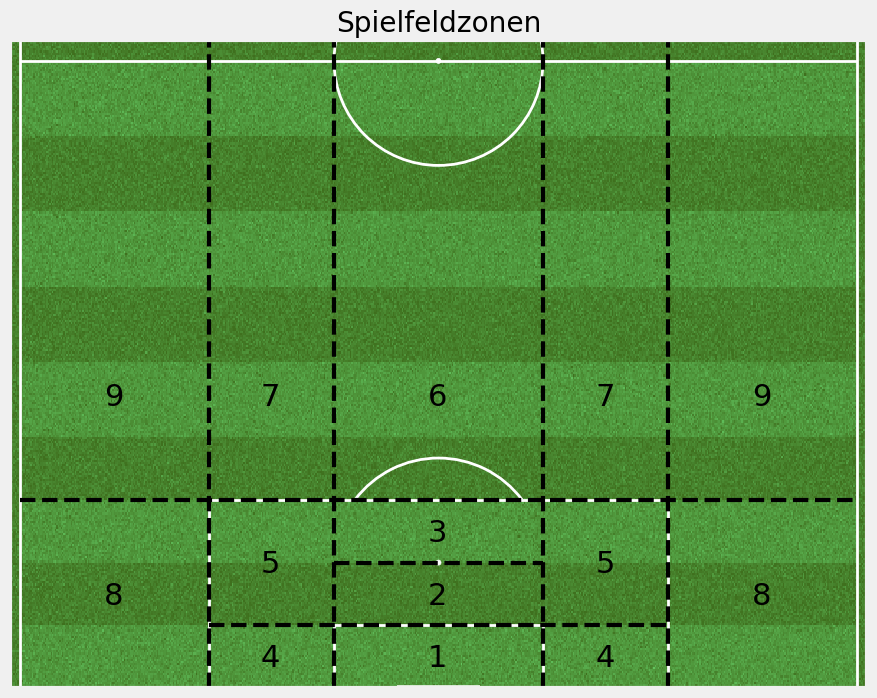

In [7]:
# Diagramm zu den Spielfeldzonen
pitch = Pitch(figsize=(15,8), pitch_color='grass', line_color='white', stripe=True, axis=True, 
              orientation='vertical', tight_layout=False)
fig, ax = pitch.draw()
ax.vlines(30,0,120,linestyle='--', linewidth=3)
ax.vlines(50,0,120,linestyle='--', linewidth=3)
ax.hlines(6,18,62,linestyle='--', linewidth=3)
ax.hlines(12,30,50,linestyle='--', linewidth=3)
ax.hlines(18,0,80,linestyle='--', linewidth=3)
ax.vlines(18,0,120,linestyle='--', linewidth=3)
ax.vlines(62,0,120,linestyle='--', linewidth=3)
ax.text(39,2,'1',color='k',fontsize=22)
ax.text(39,8,'2',color='k',fontsize=22)
ax.text(39,14,'3',color='k',fontsize=22)
ax.text(23,2,'4',color='k',fontsize=22)
ax.text(55,2,'4',color='k',fontsize=22)
ax.text(23,11,'5',color='k',fontsize=22)
ax.text(55,11,'5',color='k',fontsize=22)
ax.text(39,27,'6',color='k',fontsize=22)
ax.text(23,27,'7',color='k',fontsize=22)
ax.text(55,27,'7',color='k',fontsize=22)
ax.text(8,8,'8',color='k',fontsize=22)
ax.text(70,8,'8',color='k',fontsize=22)
ax.text(8,27,'9',color='k',fontsize=22)
ax.text(70,27,'9',color='k',fontsize=22)
plt.ylim(0,62)
plt.xlim(-1,81)
plt.title('Spielfeldzonen')
plt.show()

In [8]:
plt.style.use('fivethirtyeight')
params = {'axes.titlesize': 'x-large',
          'axes.labelsize': 'large', 
          'xtick.labelsize':'large',
          'ytick.labelsize':'large'}
plt.rcParams.update(params)

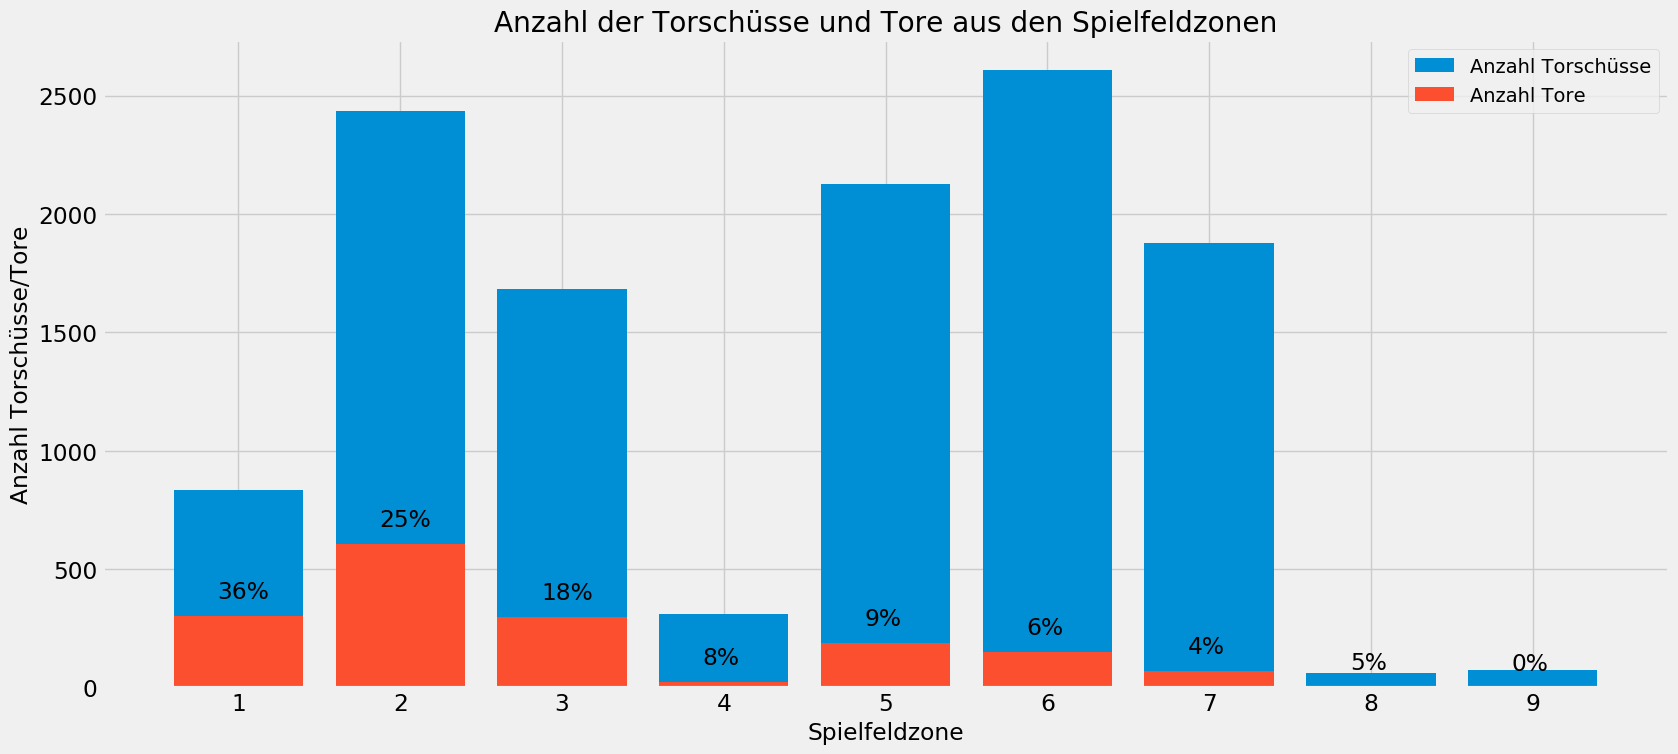

In [9]:
# Torschüsse und Tore in Abhängigkeit der Spielfeldzone
shots_zonen = [shots_zone1, shots_zone2, shots_zone3, shots_zone4, shots_zone5, shots_zone6, shots_zone7, shots_zone8, shots_zone9]
num_goals = [len(shots_zone[shots_zone['goal'] == 1]) for shots_zone in shots_zonen]
num_shots = [len(shots_zone) for shots_zone in shots_zonen]
pct_scored = [int(np.round(100 * num_goals[i] / num_shots[i])) for i in range(len(num_shots))]
plt.figure(figsize=(18,8))
plt.bar(x=[str(i) for i in np.arange(1, len(shots_zonen)+1)], height=num_shots, label='Anzahl Torschüsse')
plt.bar(x=[str(i) for i in np.arange(1, len(shots_zonen)+1)], height=num_goals, label='Anzahl Tore')
for i in range(len(shots_zonen)):
    plt.text(i - 0.13, num_goals[i] + 75, str(pct_scored[i]) + '%', fontsize='large')
plt.title('Anzahl der Torschüsse und Tore aus den Spielfeldzonen')
plt.xlabel('Spielfeldzone')
plt.ylabel('Anzahl Torschüsse/Tore')
plt.legend()
plt.show()

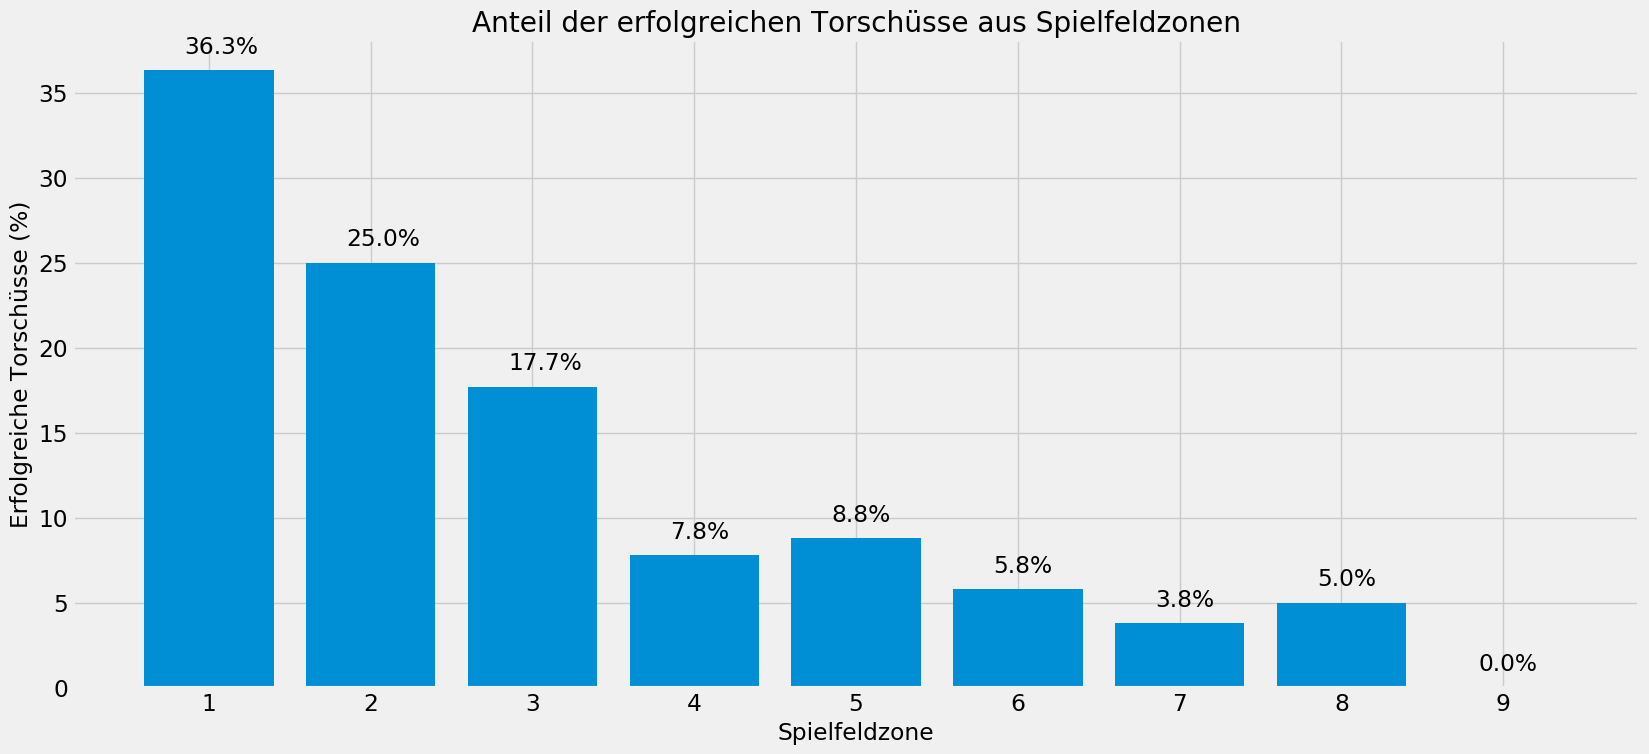

In [10]:
# Anteil der erfolgreichen Torschüsse pro Spielfeldzone
shots_zonen = [shots_zone1, shots_zone2, shots_zone3, shots_zone4, shots_zone5, shots_zone6, shots_zone7, shots_zone8, shots_zone9]
num_goals = [len(shots_zone[shots_zone['goal'] == 1]) for shots_zone in shots_zonen]
num_shots = [len(shots_zone) for shots_zone in shots_zonen]
pct_scored = [np.round(100 * num_goals[i] / num_shots[i], 1) for i in range(len(num_shots))]
plt.figure(figsize=(18,8))
plt.bar(x=[str(i) for i in np.arange(1, len(shots_zonen)+1)], height=pct_scored)
for i in range(len(shots_zonen)):
    plt.text(i - 0.15, pct_scored[i] + 1, str(pct_scored[i]) + '%', fontsize='large')
plt.title('Anteil der erfolgreichen Torschüsse aus Spielfeldzonen')
plt.xlabel('Spielfeldzone')
plt.ylabel('Erfolgreiche Torschüsse (%)')
plt.show()

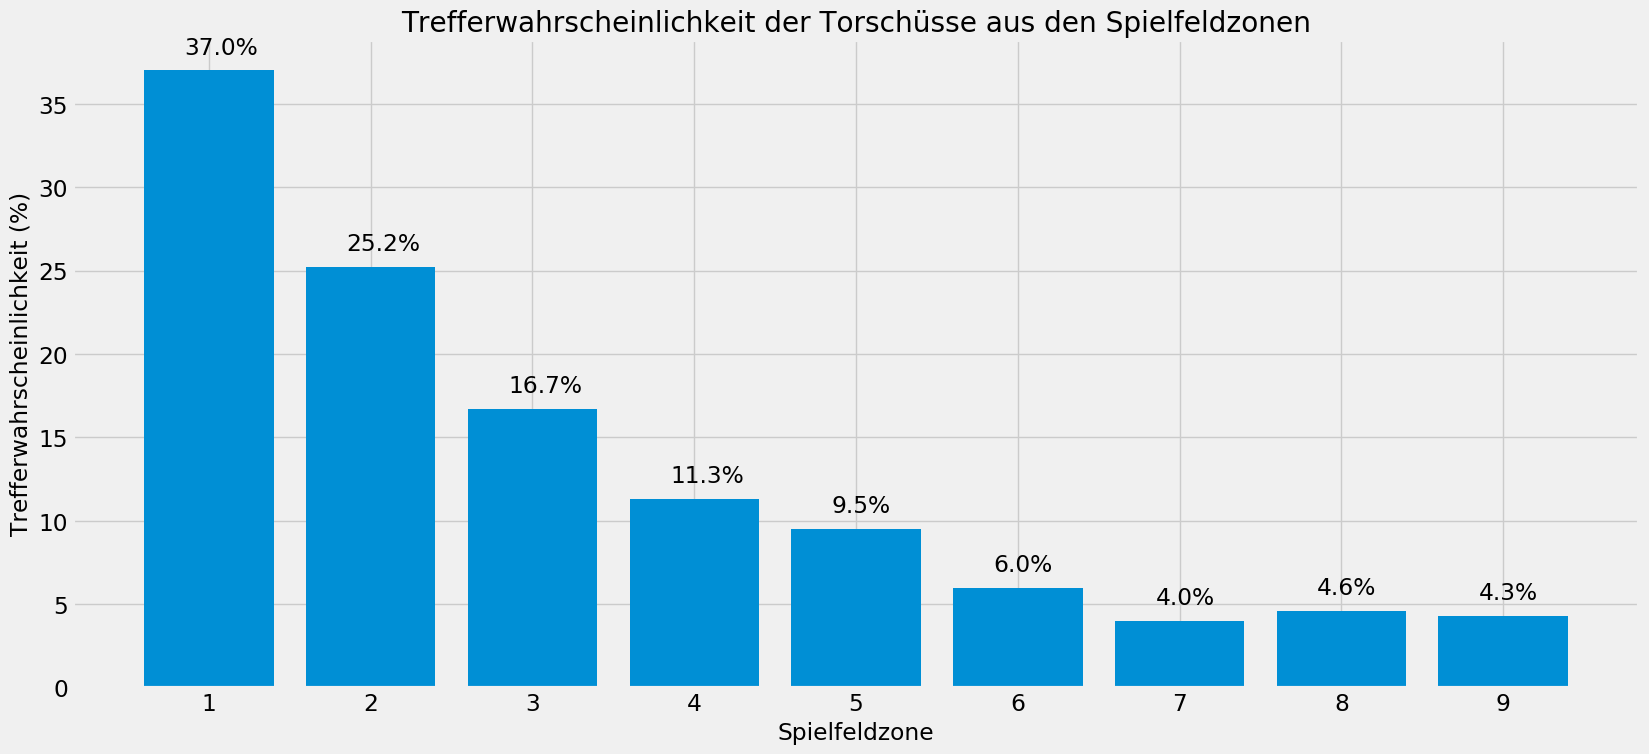

In [11]:
# Trefferwahrscheinlichkeit pro Spielfeldzone
shots_zonen = [shots_zone1, shots_zone2, shots_zone3, shots_zone4, shots_zone5, shots_zone6, shots_zone7, shots_zone8, shots_zone9]
xg_shots = [100*np.round(shots_zone['pred_xg'].mean(),3) for shots_zone in shots_zonen]
plt.figure(figsize=(18,8))
plt.bar(x=[str(i) for i in np.arange(1, len(shots_zonen)+1)], height=xg_shots)
for i in range(len(shots_zonen)):
    plt.text(i - 0.15, xg_shots[i] + 1, str(xg_shots[i]) + '%', fontsize='large')
plt.title('Trefferwahrscheinlichkeit der Torschüsse aus den Spielfeldzonen')
plt.xlabel('Spielfeldzone')
plt.ylabel('Trefferwahrscheinlichkeit (%)')
plt.show()

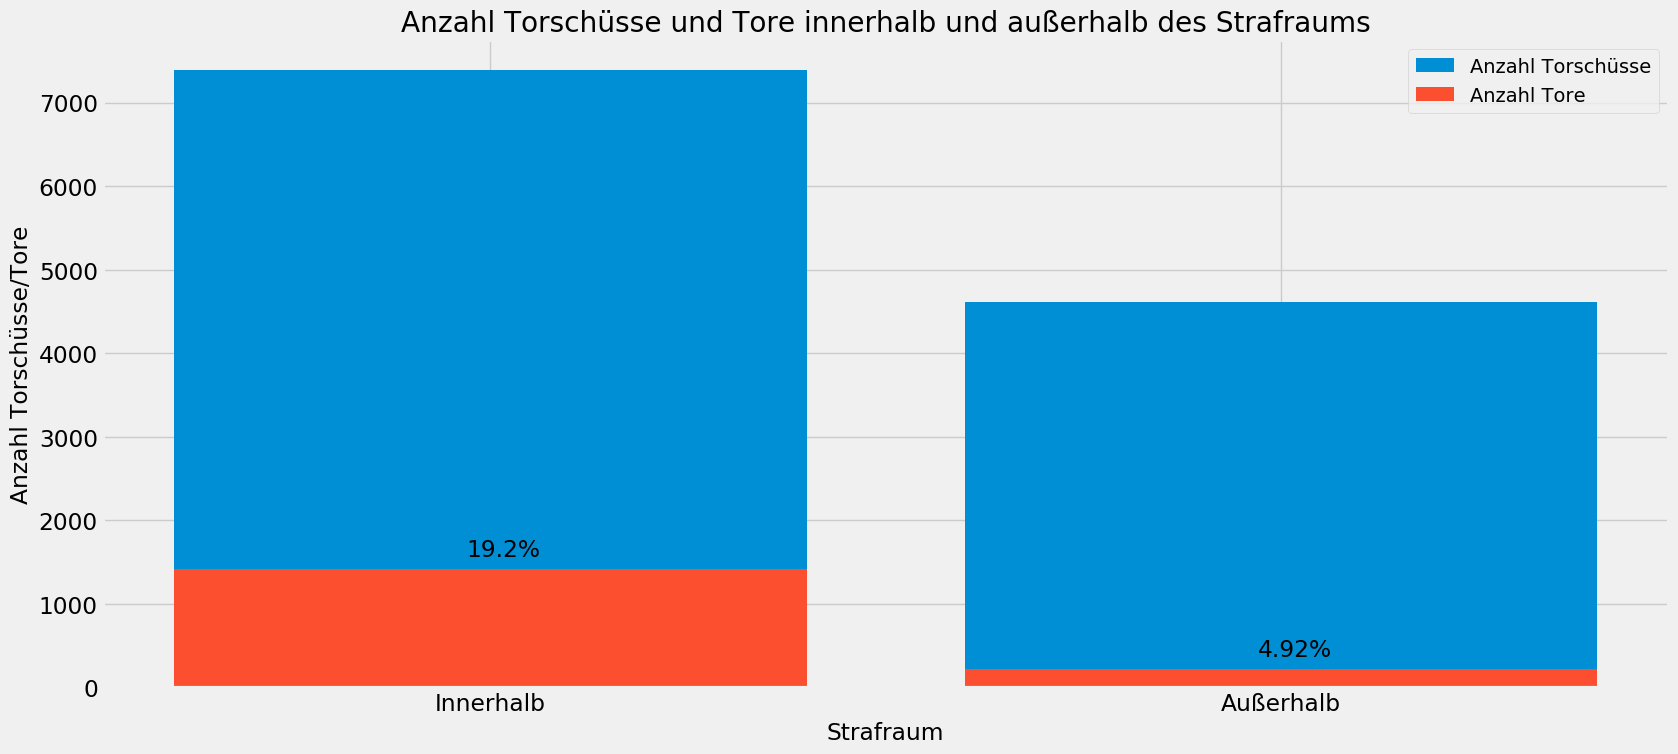

In [12]:
shots_inside_box = pd.concat([shots_zone1, shots_zone2, shots_zone3, shots_zone4, shots_zone5])
shots_outside_box = pd.concat([shots_zone6, shots_zone7, shots_zone8, shots_zone9])
shots_box = [shots_inside_box, shots_outside_box]
num_goals = [len(shots_boxx[shots_boxx['goal'] == 1]) for shots_boxx in shots_box]
num_shots = [len(shots_boxx) for shots_boxx in shots_box]
pct_scored = [np.round(100 * num_goals[i] / num_shots[i], 2) for i in range(len(num_shots))]
plt.figure(figsize=(18,8))
plt.bar(x=['Innerhalb', 'Außerhalb'], height=num_shots, label='Anzahl Torschüsse')
plt.bar(x=['Innerhalb', 'Außerhalb'], height=num_goals, label='Anzahl Tore')
for i in range(len(shots_box)):
    plt.text(i - 0.03, num_goals[i] + 150, str(pct_scored[i]) + '%', fontsize='large')
plt.title('Anzahl Torschüsse und Tore innerhalb und außerhalb des Strafraums')
plt.xlabel('Strafraum')
plt.ylabel('Anzahl Torschüsse/Tore')
plt.legend()
plt.show()

In [13]:
plt.style.use('default')
plt.style.use('fivethirtyeight')

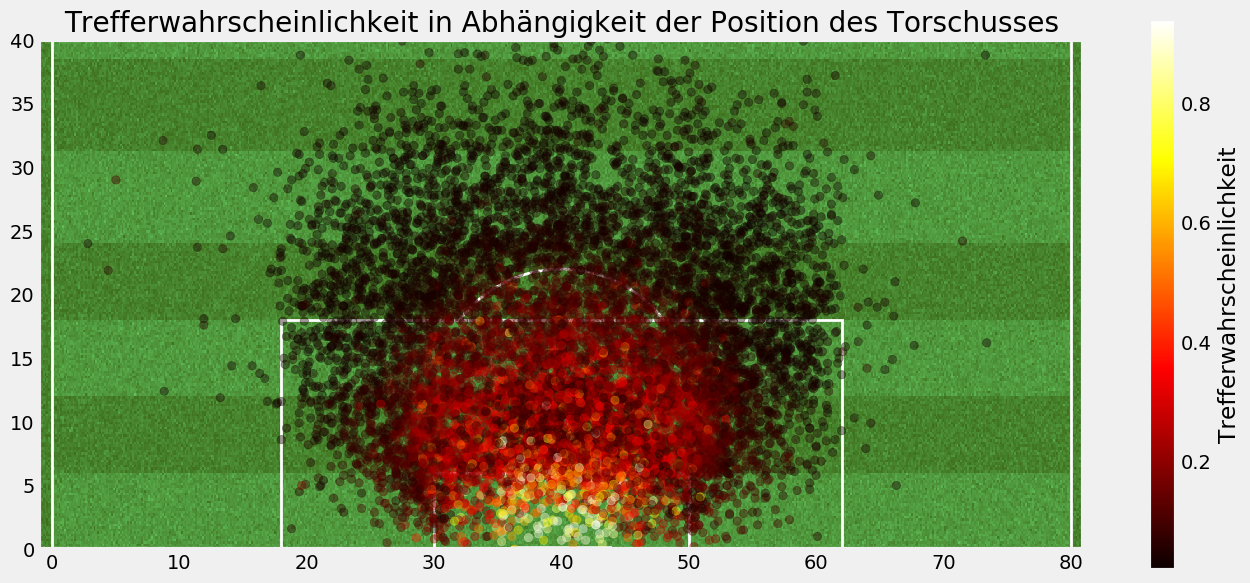

In [14]:
open_shots = shots[shots['open_play'] == 1]
pitch = Pitch(figsize=(15,8), pitch_color='grass', line_color='white', stripe=True, axis=True, label=True, tick=True,
              orientation='vertical', tight_layout=False)
fig, ax = pitch.draw()
m = ax.scatter(80-open_shots['location_y'], 120-open_shots['location_x'], c=open_shots['pred_xg'], alpha=0.4, cmap='hot')
cbar = plt.colorbar(m, label='Trefferwahrscheinlichkeit', shrink=0.85)
cbar.solids.set_edgecolor("face")
cbar.set_alpha(1)
cbar.draw_all()
plt.ylim(0,40)
plt.xlim(-1,81)
plt.title('Trefferwahrscheinlichkeit in Abhängigkeit der Position des Torschusses')
plt.show()

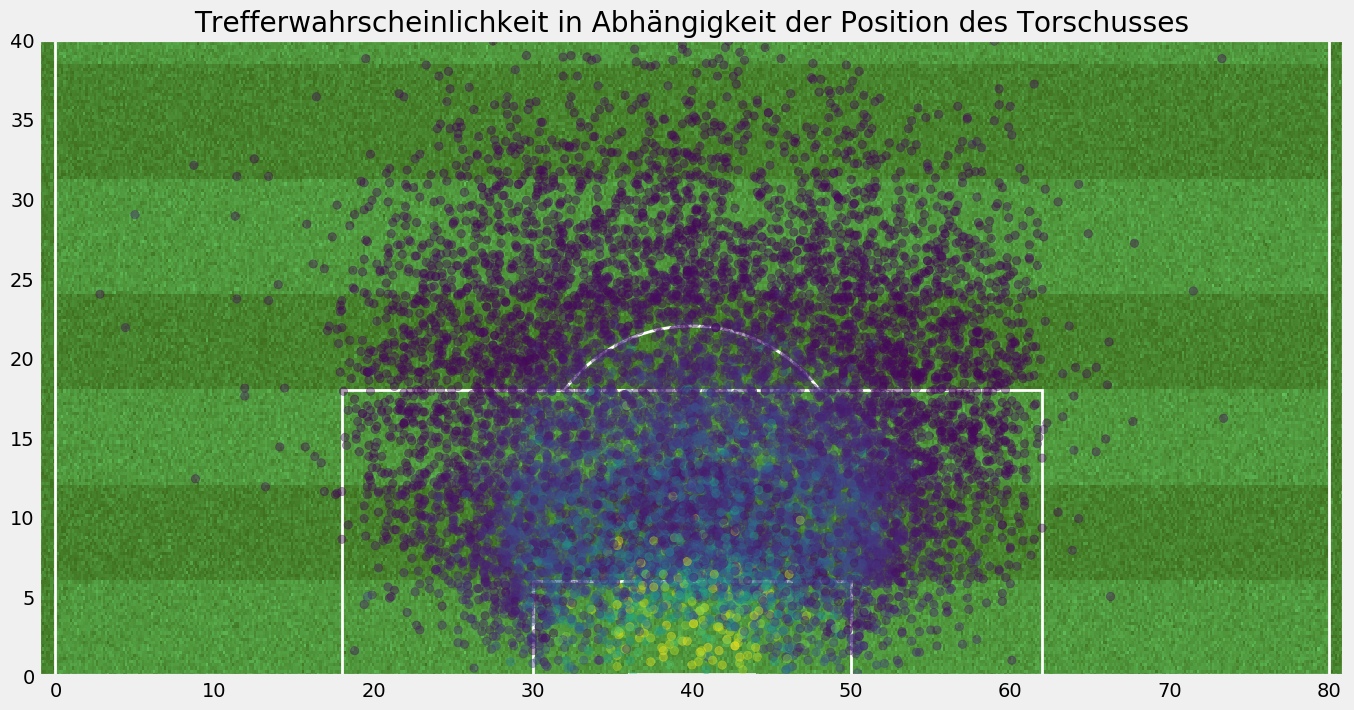

In [15]:
open_shots = shots[shots['open_play'] == 1]
pitch = Pitch(figsize=(15,8), pitch_color='grass', line_color='white', stripe=True, axis=True, label=True, tick=True,
              orientation='vertical', tight_layout=False)
fig, ax = pitch.draw()
ax.scatter(80-open_shots['location_y'], 120-open_shots['location_x'], c=open_shots['pred_xg'], alpha=0.4) # cmap='hot'
plt.ylim(0,40)
plt.xlim(-1,81)
plt.title('Trefferwahrscheinlichkeit in Abhängigkeit der Position des Torschusses')
plt.show()

C:\Users\Juhaninho\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


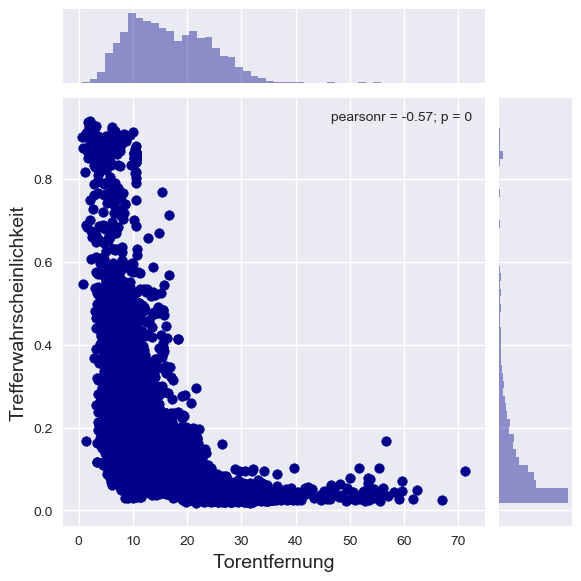

In [16]:
plt.style.use('seaborn')
j = sns.jointplot(x='goal_distance_m', y='pred_xg', data=shots, color='darkblue')
j.set_axis_labels('Torentfernung', 'Trefferwahrscheinlichkeit', fontsize=14)
plt.show()

C:\Users\Juhaninho\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


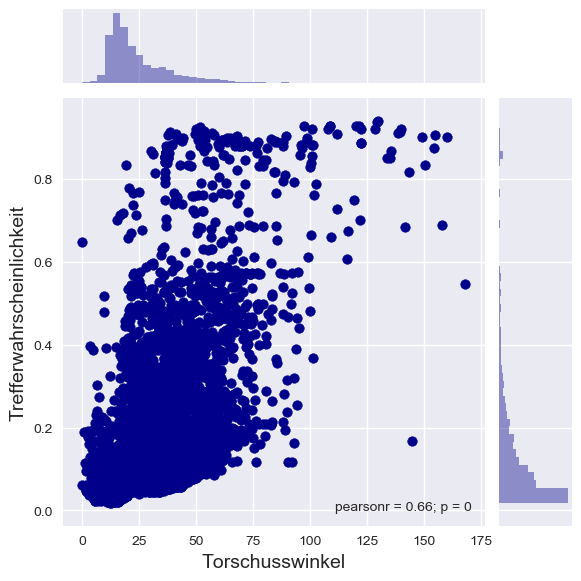

In [17]:
plt.style.use('seaborn')
j = sns.jointplot(x='goal_angle', y='pred_xg', data=shots, color='darkblue')
j.set_axis_labels('Torschusswinkel', 'Trefferwahrscheinlichkeit', fontsize=14)
plt.show()
plt.style.use('default')
plt.style.use('fivethirtyeight')

In [20]:
shot_assists = passes[(passes['shot_assist'] == 1) | (passes['goal_assist'] == 1)]
shot_assists_zone1 = shot_assists[(shot_assists['location_x'] >= 114) & (shot_assists['location_y'].between(30,50))]
shot_assists_zone2 = shot_assists[(shot_assists['location_x'].between(108, 113.999)) & (shot_assists['location_y'].between(30,50))]
shot_assists_zone3 = shot_assists[(shot_assists['location_x'].between(102, 107.999)) & (shot_assists['location_y'].between(30,50))]
shot_assists_zone4 = shot_assists[(shot_assists['location_x'] >= 114) & ((shot_assists['location_y'].between(18, 29.999)) | (shot_assists['location_y'].between(50.001, 62)))]
shot_assists_zone5 = shot_assists[(shot_assists['location_x'].between(102, 113.999)) & ((shot_assists['location_y'].between(18, 29.999)) | (shot_assists['location_y'].between(50.001, 62)))]
shot_assists_zone6 = shot_assists[(shot_assists['location_x'] < 102) & (shot_assists['location_y'].between(30,50))]
shot_assists_zone7 = shot_assists[(shot_assists['location_x'] < 102) & ((shot_assists['location_y'].between(18, 29.999)) | (shot_assists['location_y'].between(50.001, 62)))]
shot_assists_zone8 = shot_assists[(shot_assists['location_x'] >= 102) & ((shot_assists['location_y'] < 18) | (shot_assists['location_y'] > 62))]
shot_assists_zone9 = shot_assists[(shot_assists['location_x'] < 102) & ((shot_assists['location_y'] < 18) | (shot_assists['location_y'] > 62))]

In [21]:
plt.style.use('fivethirtyeight')
params = {'axes.titlesize': 'x-large',
          'axes.labelsize': 'large', 
          'xtick.labelsize':'large',
          'ytick.labelsize':'large'}
plt.rcParams.update(params)

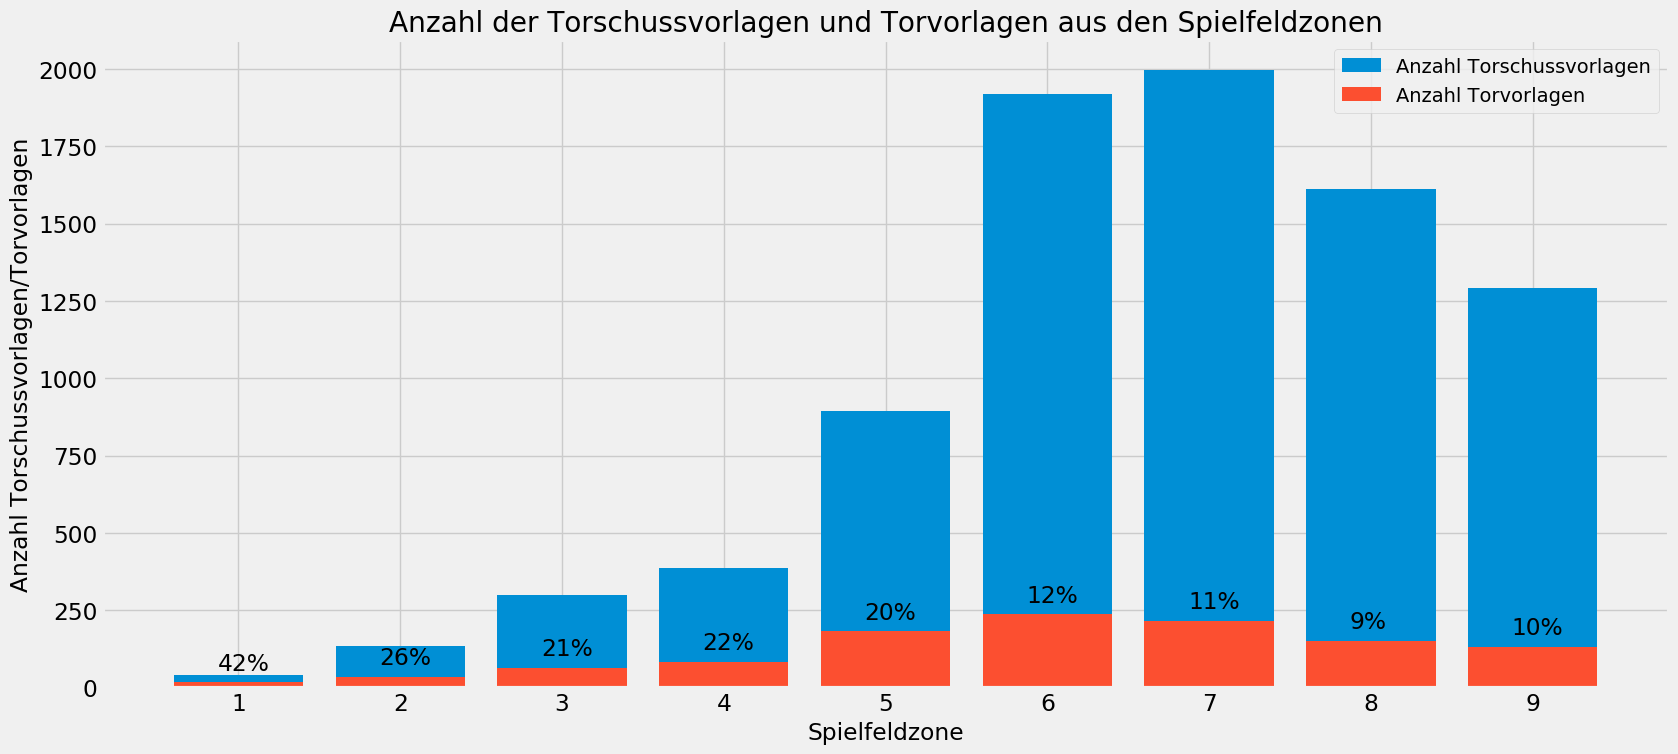

In [22]:
# Torschussvorlagen und Torvorlagen in Abhängigkeit der Spielfeldzone
shot_assists_zonen = [shot_assists_zone1, shot_assists_zone2, shot_assists_zone3, shot_assists_zone4, shot_assists_zone5, shot_assists_zone6, shot_assists_zone7, shot_assists_zone8, shot_assists_zone9]
num_goal_assists = [len(shot_assists_zone[shot_assists_zone['goal_assist'] == 1]) for shot_assists_zone in shot_assists_zonen]
num_shot_assists = [len(shot_assists_zone) for shot_assists_zone in shot_assists_zonen]
pct_scored = [int(np.round(100 * num_goal_assists[i] / num_shot_assists[i])) for i in range(len(num_shot_assists))]
plt.figure(figsize=(18,8))
plt.bar(x=[str(i) for i in np.arange(1, len(shot_assists_zonen)+1)], height=num_shot_assists, label='Anzahl Torschussvorlagen')
plt.bar(x=[str(i) for i in np.arange(1, len(shot_assists_zonen)+1)], height=num_goal_assists, label='Anzahl Torvorlagen')
for i in range(len(shot_assists_zonen)):
    plt.text(i - 0.13, num_goal_assists[i] + 40, str(pct_scored[i]) + '%', fontsize='large')
plt.title('Anzahl der Torschussvorlagen und Torvorlagen aus den Spielfeldzonen')
plt.xlabel('Spielfeldzone')
plt.ylabel('Anzahl Torschussvorlagen/Torvorlagen')
plt.legend()
plt.show()

In [23]:
def get_zone(location_x, location_y):
    if (location_x >= 114) & (30 <= location_y <= 50):
        return 1
    if (108 <= location_x < 114) & (30 <= location_y <= 50):
        return 2
    if (102 <= location_x < 108) & (30 <= location_y <= 50):
        return 3
    if (location_x >= 114) & ((18 <= location_y < 30) | (50 < location_y <= 62)):
        return 4
    if (102 <= location_x < 114) & ((18 <= location_y < 30) | (50 < location_y <= 62)):
        return 5
    if (location_x < 102) & (30 <= location_y <= 50):
        return 6
    if (location_x < 102) & ((18 <= location_y < 30) | (50 < location_y <= 62)):
        return 7
    if (location_x >= 102) & ((location_y < 18) | (location_y > 62)):
        return 8
    if (location_x < 102) & ((location_y < 18) | (location_y > 62)):
        return 9
    return -1

In [24]:
shot_assists = passes[(passes['shot_assist'] == 1) | (passes['goal_assist'] == 1)]
shot_assists.loc[:, 'from_zone'] = [get_zone(shot_assists['location_x'].iloc[i], shot_assists['location_y'].iloc[i]) for i in range(len(shot_assists))]
shot_assists.loc[:, 'to_zone'] = [get_zone(shot_assists['end_location_x'].iloc[i], shot_assists['end_location_y'].iloc[i]) for i in range(len(shot_assists))]

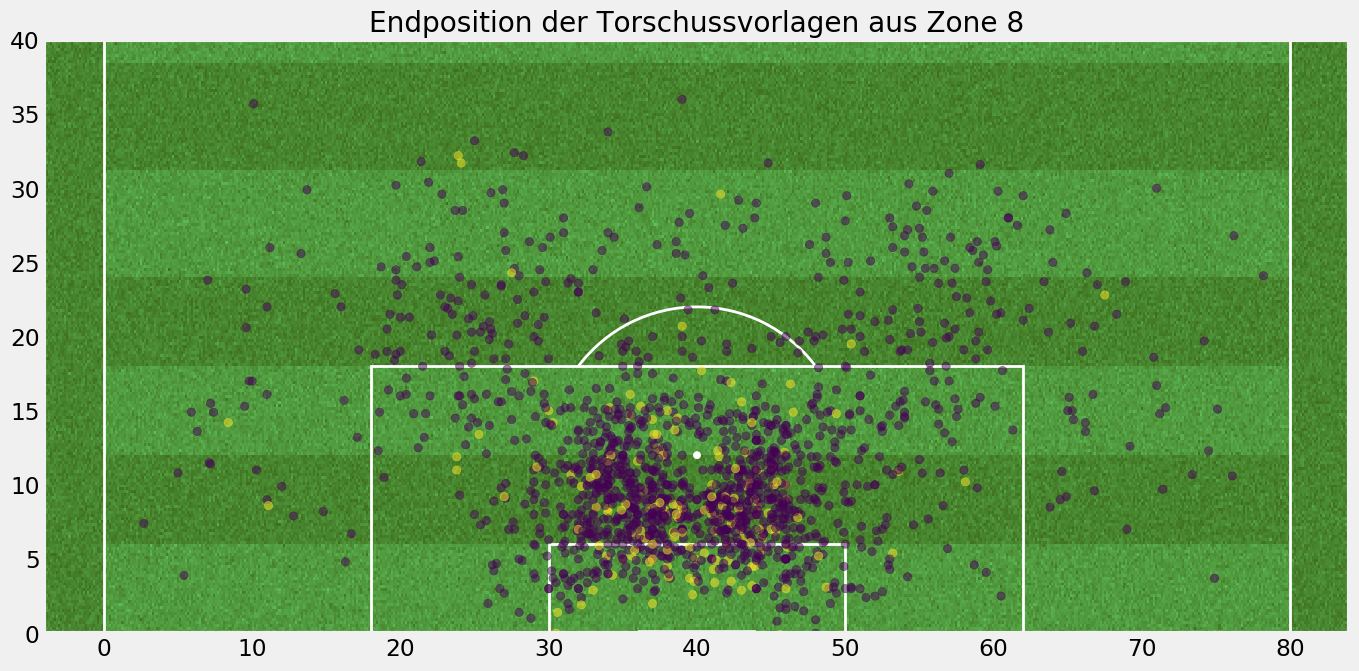

In [25]:
shot_assists_zone4 = shot_assists[shot_assists['from_zone'] == 8]
pitch = Pitch(figsize=(15,8), pitch_color='grass', line_color='white', stripe=True, axis=True, label=True, tick=True,
              orientation='vertical', tight_layout=False)
fig, ax = pitch.draw()
ax.scatter(80-shot_assists_zone4['end_location_y'], 120-shot_assists_zone4['end_location_x'], c=shot_assists_zone4['goal_assist'], alpha=0.5)
plt.ylim(0,40)
plt.title('Endposition der Torschussvorlagen aus Zone 8')
plt.show()

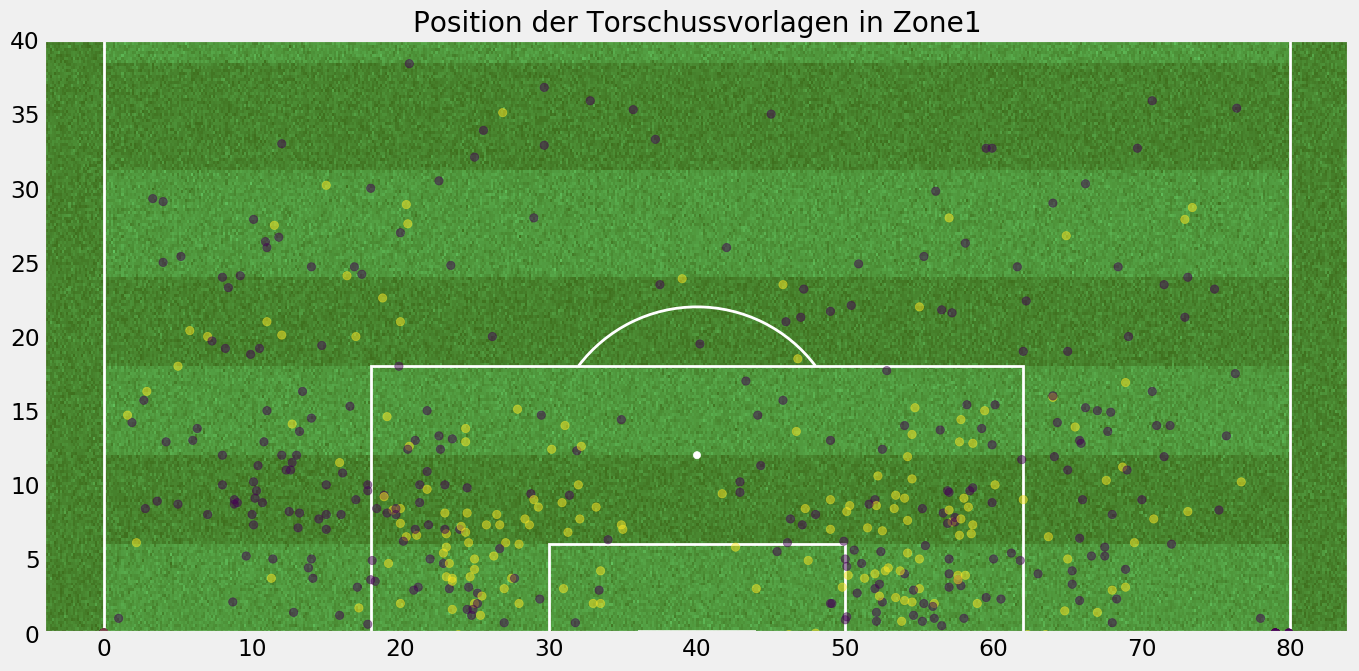

In [26]:
shot_assists_to_zone1 = shot_assists[shot_assists['to_zone'] == 1]
pitch = Pitch(figsize=(15,8), pitch_color='grass', line_color='white', stripe=True, axis=True, label=True, tick=True,
              orientation='vertical', tight_layout=False)
fig, ax = pitch.draw()
ax.scatter(80-shot_assists_to_zone1['location_y'], 120-shot_assists_to_zone1['location_x'], c=shot_assists_to_zone1['goal_assist'], alpha=0.5)
plt.ylim(0,40)
plt.title('Position der Torschussvorlagen in Zone1')
plt.show()

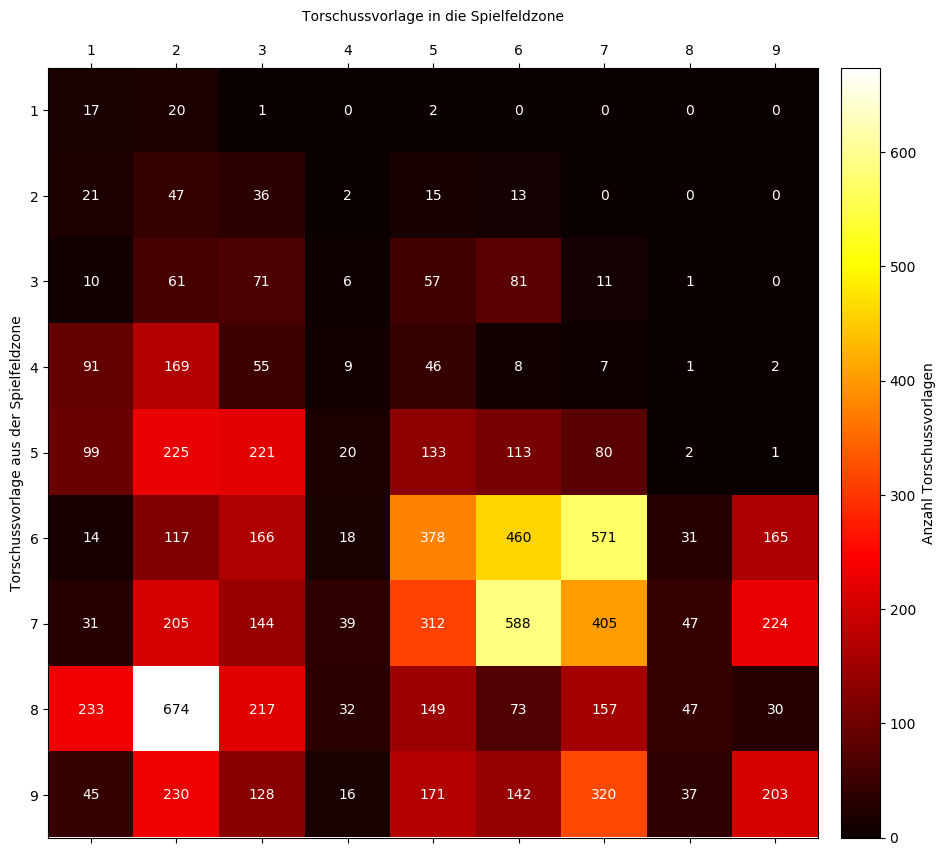

In [27]:
# Anzahl der Torschussvorlagen von einer Spielfeldzone in eine andere Spielfeldzone
shot_assist_matrix = pd.DataFrame(columns=np.arange(1,10), index=np.arange(1,10))
for col in shot_assist_matrix.columns:
    for idx in shot_assist_matrix.index:
        shot_assist_matrix.loc[idx, col] = len(shot_assists[(shot_assists['from_zone'] == int(idx)) & (shot_assists['to_zone'] == int(col))])

plt.style.use('default')
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
cax = ax.matshow(shot_assist_matrix, cmap='hot')
for (i, j), z in np.ndenumerate(shot_assist_matrix):
    text_color = 'white'
    if z >= np.max(shot_assist_matrix).max() * 0.6:
        text_color = 'black'
    ax.text(j, i, z, ha='center', va='center', color=text_color)
fig.colorbar(cax, label='Anzahl Torschussvorlagen', pad=0.015)
ticks = np.arange(0, len(shot_assist_matrix.columns), 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(shot_assist_matrix.columns)
ax.set_yticklabels(shot_assist_matrix.columns)
ax.set_ylabel('Torschussvorlage aus der Spielfeldzone', fontsize=10)
ax.set_title('Torschussvorlage in die Spielfeldzone', fontsize=10)
plt.show()
plt.style.use('fivethirtyeight')

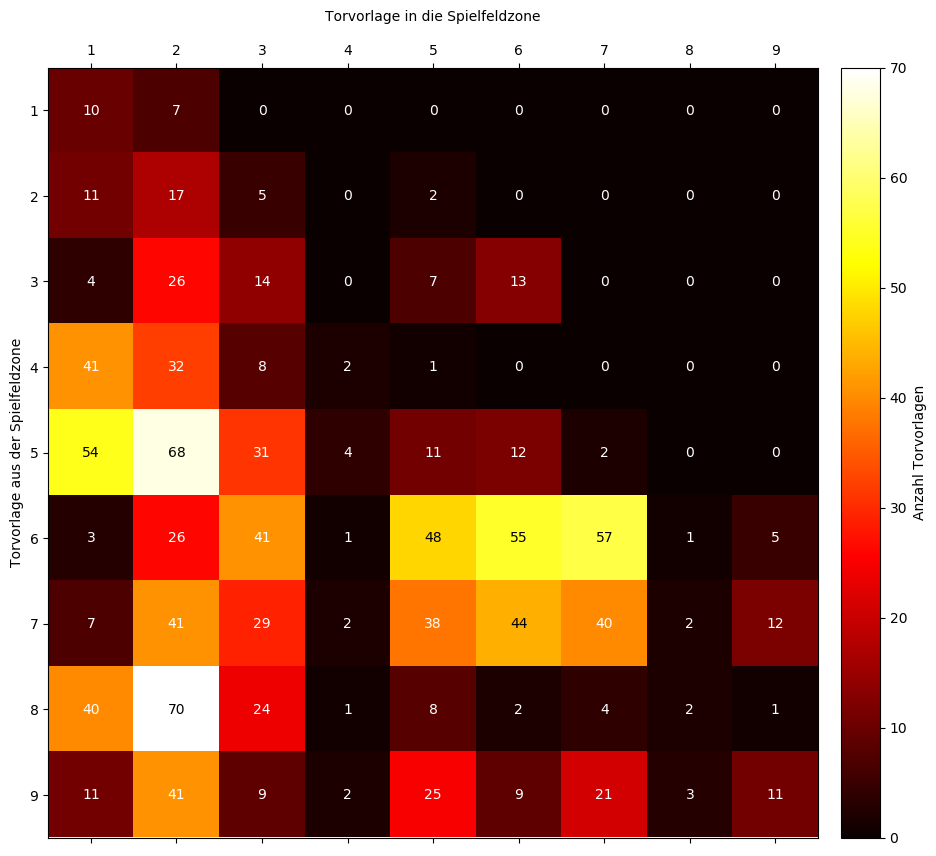

In [28]:
# Anzahl der Torvorlagen von einer Spielfeldzone in eine andere Spielfeldzone
goal_assists = shot_assists[shot_assists['goal_assist'] == 1]
goal_assist_matrix = pd.DataFrame(columns=np.arange(1,10), index=np.arange(1,10))
for col in goal_assist_matrix.columns:
    for idx in goal_assist_matrix.index:
        goal_assist_matrix.loc[idx, col] = len(goal_assists[(goal_assists['from_zone'] == int(idx)) & (goal_assists['to_zone'] == int(col))])

plt.style.use('default')
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
cax = ax.matshow(goal_assist_matrix, cmap='hot')
for (i, j), z in np.ndenumerate(goal_assist_matrix):
    text_color = 'white'
    if z >= np.max(goal_assist_matrix).max() * 0.6:
        text_color = 'black'
    ax.text(j, i, z, ha='center', va='center', color=text_color)
fig.colorbar(cax, label='Anzahl Torvorlagen', pad=0.015)
ticks = np.arange(0, len(goal_assist_matrix.columns), 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(goal_assist_matrix.columns)
ax.set_yticklabels(goal_assist_matrix.columns)
ax.set_ylabel('Torvorlage aus der Spielfeldzone', fontsize=10)
ax.set_title('Torvorlage in die Spielfeldzone', fontsize=10)
plt.show()
plt.style.use('fivethirtyeight')

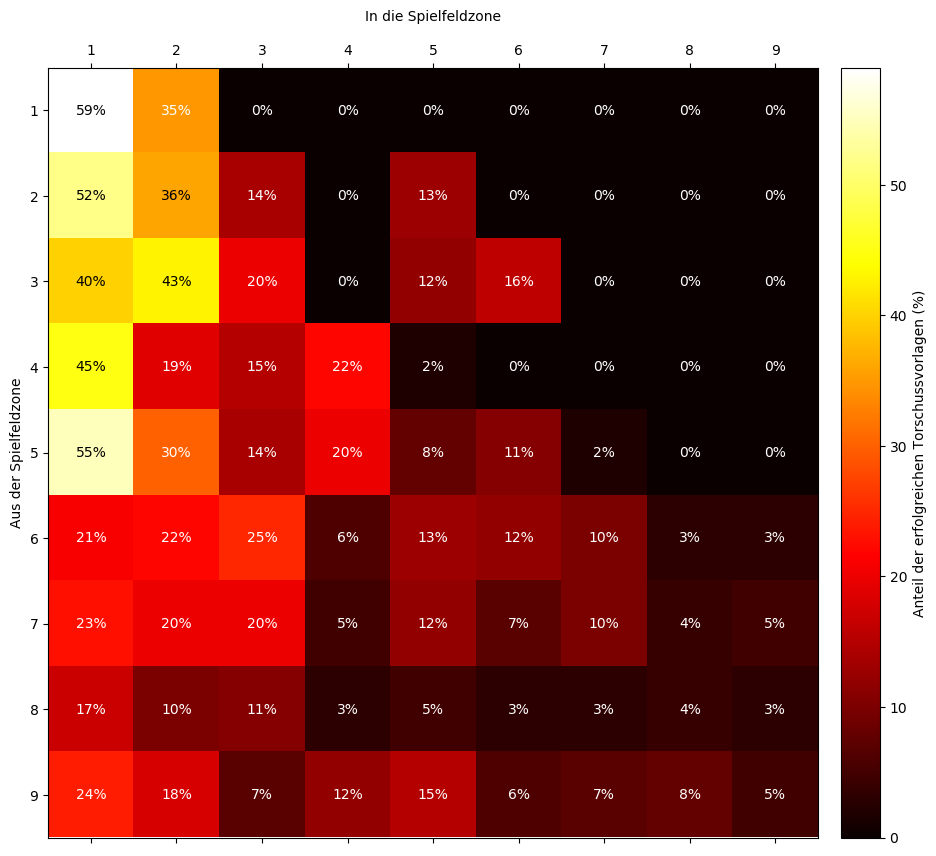

In [29]:
# Anteil der erfolgreichen Torschussvorlagen von einer Spielfeldzone in eine andere Spielfeldzone
pct_assist_matrix = pd.DataFrame(columns=np.arange(1,10), index=np.arange(1,10))
for col in pct_assist_matrix.columns:
    for idx in pct_assist_matrix.index:
        num_shot_assists = len(shot_assists[(shot_assists['from_zone'] == int(idx)) & (shot_assists['to_zone'] == int(col))])
        num_goal_assists = len(goal_assists[(goal_assists['from_zone'] == int(idx)) & (goal_assists['to_zone'] == int(col))])
        if num_shot_assists > 0:
            pct_assist_matrix.loc[idx, col] = int(np.round(100 * num_goal_assists / num_shot_assists))
        else:
            pct_assist_matrix.loc[idx, col] = 0

plt.style.use('default')
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
cax = ax.matshow(pct_assist_matrix, cmap='hot')
for (i, j), z in np.ndenumerate(pct_assist_matrix):
    text_color = 'white'
    if z >= np.max(pct_assist_matrix).max() * 0.6:
        text_color = 'black'
    ax.text(j, i, str(z) + '%', ha='center', va='center', color=text_color)
fig.colorbar(cax, label='Anteil der erfolgreichen Torschussvorlagen (%)', pad=0.015)
ticks = np.arange(0, len(pct_assist_matrix.columns), 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(pct_assist_matrix.columns)
ax.set_yticklabels(pct_assist_matrix.columns)
ax.set_ylabel('Aus der Spielfeldzone', fontsize=10)
ax.set_title('In die Spielfeldzone', fontsize=10)
plt.show()
plt.style.use('fivethirtyeight')

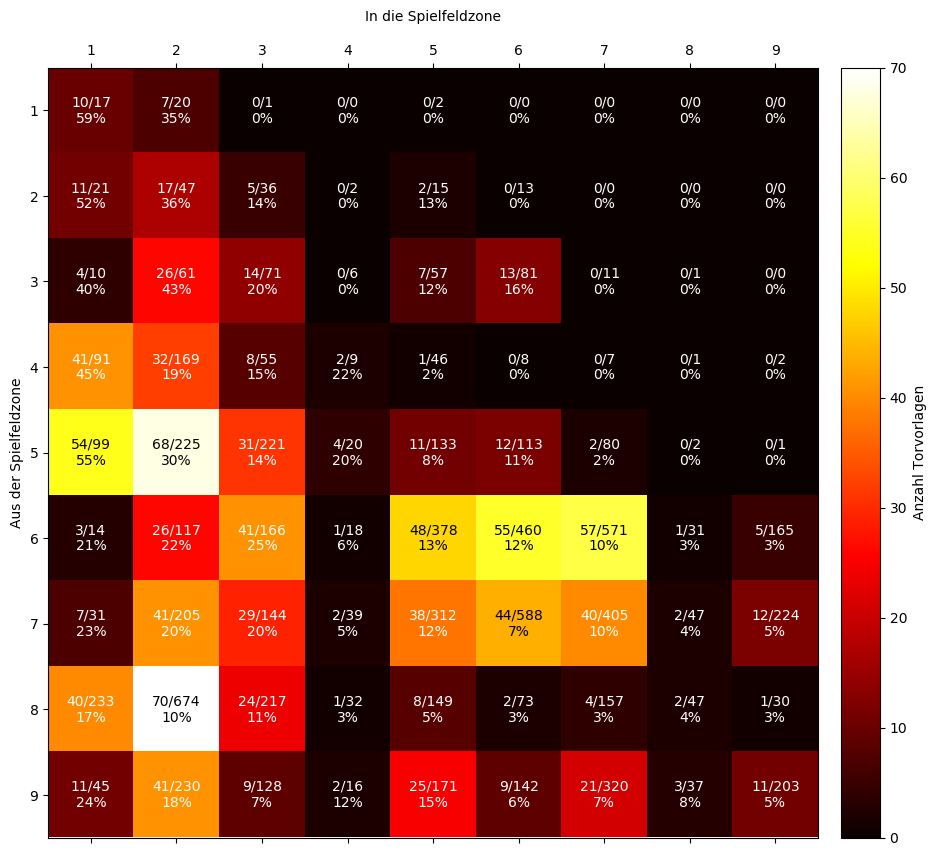

In [30]:
# Anzahl der Torvorlagen von einer Spielfeldzone in eine andere Spielfeldzone
plt.style.use('default')
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
cax = ax.matshow(goal_assist_matrix, cmap='hot')
for (i, j), z in np.ndenumerate(goal_assist_matrix):
    text_color = 'white'
    if z >= np.max(goal_assist_matrix).max() * 0.6:
        text_color = 'black'
    ax.text(j, i, str(z) + '/' + str(shot_assist_matrix[j+1][i+1]) + '\n' + str(pct_assist_matrix[j+1][i+1]) + '%', ha='center', va='center', color=text_color)
fig.colorbar(cax, label='Anzahl Torvorlagen', pad=0.015)
ticks = np.arange(0, len(goal_assist_matrix.columns), 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(goal_assist_matrix.columns)
ax.set_yticklabels(goal_assist_matrix.columns)
ax.set_ylabel('Aus der Spielfeldzone', fontsize=10)
ax.set_title('In die Spielfeldzone', fontsize=10)
plt.show()
plt.style.use('fivethirtyeight')

In [31]:
plt.style.use('fivethirtyeight')
params = {'axes.titlesize': 'x-large',
          'axes.labelsize': 'large', 
          'xtick.labelsize':'large',
          'ytick.labelsize':'large'}
plt.rcParams.update(params)

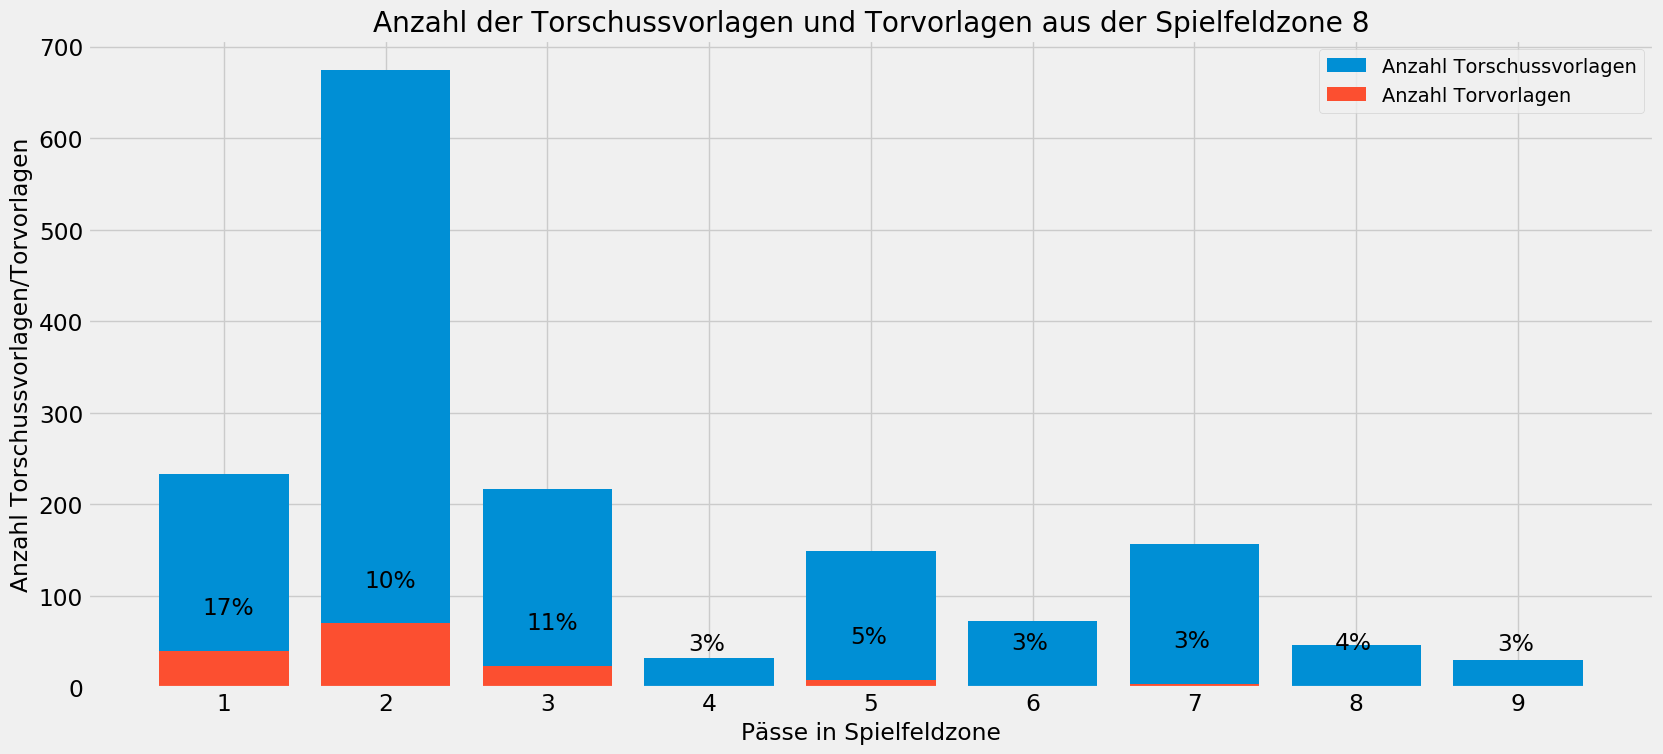

In [32]:
# Torschussvorlagen und Torvorlagen aus Spielfeldzone 8
shot_assists_from8 = shot_assists[shot_assists['from_zone'] == 8]
shot_assists_zonen = [shot_assists_from8[shot_assists_from8['to_zone'] == i] for i in np.arange(1, 10)]
num_goal_assists = [len(shot_assists_zone[shot_assists_zone['goal_assist'] == 1]) for shot_assists_zone in shot_assists_zonen]
num_shot_assists = [len(shot_assists_zone) for shot_assists_zone in shot_assists_zonen]
pct_scored = [int(np.round(100 * num_goal_assists[i] / num_shot_assists[i])) for i in range(len(num_shot_assists))]
plt.figure(figsize=(18,8))
plt.bar(x=[str(i) for i in np.arange(1, len(shot_assists_zonen)+1)], height=num_shot_assists, label='Anzahl Torschussvorlagen')
plt.bar(x=[str(i) for i in np.arange(1, len(shot_assists_zonen)+1)], height=num_goal_assists, label='Anzahl Torvorlagen')
for i in range(len(shot_assists_zonen)):
    plt.text(i - 0.13, num_goal_assists[i] + 40, str(pct_scored[i]) + '%', fontsize='large')
plt.title('Anzahl der Torschussvorlagen und Torvorlagen aus der Spielfeldzone 8')
plt.xlabel('Pässe in Spielfeldzone')
plt.ylabel('Anzahl Torschussvorlagen/Torvorlagen')
plt.legend()
plt.show()